Zaimplementować algorytm Johnsona do szukania odegłości pomiędzy wszystkimi parami wierzchołków na ważonym grafie skierowanym.

In [ ]:
def johnson(self):
        self.graph.add_node('s')
        for node in self.graph.nodes():
            if node != 's':
                self.graph.add_edge('s', node, weight=0)
        try:
            _, h = nx.bellman_ford_predecessor_and_distance(self.graph, source='s', weight='weight')
        except nx.NetworkXUnbounded:
            print("Graph contains a negative weight cycle")
            return None
        for u, v, data in self.graph.edges(data=True):
            data['weight'] = data['weight'] + h[u] - h[v]
        D = {}
        for u in self.graph.nodes():
            if u != 's':
                D[u] = nx.single_source_dijkstra_path_length(self.graph, source=u, weight='weight')
        for u in D:
            for v in D[u]:
                D[u][v] = D[u][v] - h[u] + h[v]
        self.graph.remove_node('s')
        return D

Directed graph
Johnson's algorithm result:
Node:		[0, 1, 2, 3]
0:		[0, 7, 4, 13]
1:		[10, 0, 2, 9]
2:		[14, 4, 0, 9]
3:		[17, 7, 3, 0]


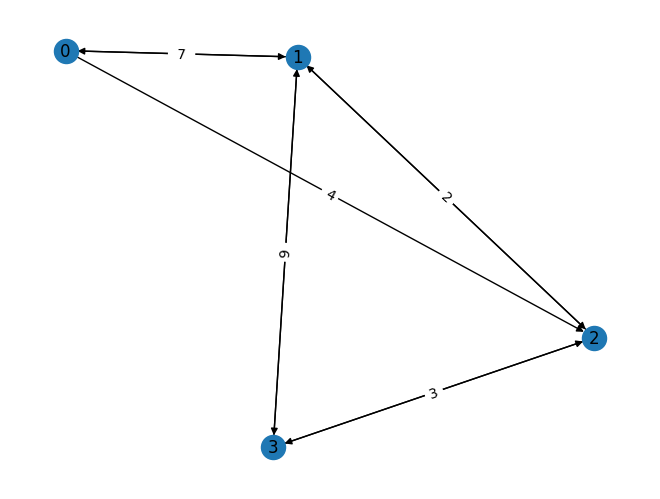

In [4]:
import lab34o as l1
def main():
    G = l1.MyGraph()
    G.generate_random_weighted_graph(4, 0.5, directed=True)
    print("Directed graph")
    print("Johnson's algorithm result:")
    johnson_result = G.johnson()
    print("Node:\t\t",end="")
    print(sorted(johnson_result.keys()))
    for key in sorted(johnson_result.keys()):
        print(key, ":\t\t", [dist for node, dist in sorted(johnson_result[key].items())],sep="")
    G.print_graph()
if __name__ == '__main__':
    main()